In [1]:
!python --version

Python 3.10.12


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
cv2.__version__

'4.8.0'

In [3]:
!wget https://i.imgur.com/iWGMlJR.png
!mv iWGMlJR.png sample.png

--2023-10-16 02:02:19--  https://i.imgur.com/iWGMlJR.png
Resolving i.imgur.com (i.imgur.com)... 146.75.92.193
Connecting to i.imgur.com (i.imgur.com)|146.75.92.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 491 [image/png]
Saving to: ‘iWGMlJR.png’

iWGMlJR.png         100%[===================>]     491  --.-KB/s    in 0s      

2023-10-16 02:02:20 (31.8 MB/s) - ‘iWGMlJR.png’ saved [491/491]



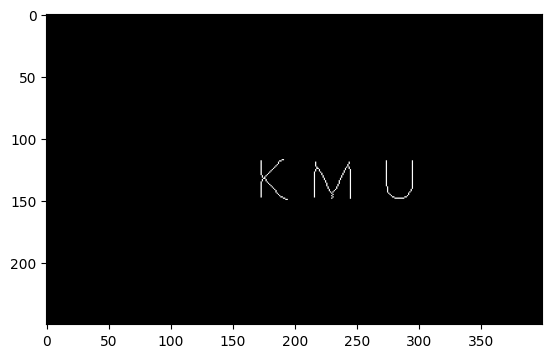

In [4]:
img = cv2.imread('sample.png')

# image 출력
plt.imshow(img)


# 4연결성과 8연결성 라벨링 출력 예시
## 숫자로 표시
![alt text](https://i.imgur.com/lQ9nXox.png)
## 색상으로 표시
![alt text](https://i.imgur.com/91M3MwP.png)

# 과제1: 4연결성 라벨링

- 위의 4연결성(4-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링하시오.
- cf. 색의 종류에는 제한이 없고, 연결된 픽셀은 같은 숫자 또는 같은 색을 가져야함.

In [5]:
from collections import deque

def bfs(org_img, check, label_number, colors, i, j, row, col):
  q = deque([])
  q.append([i, j])

  dir = [[-1,0], [0,-1], [1,0], [0,1]]
  color = list(np.random.choice(range(256), size = 3))

  cnt = 0

  while q:
    tmp = q.popleft()

    if check[tmp[0]][tmp[1]] != 1:
      check[tmp[0]][tmp[1]] = 1
      org_img[tmp[0]][tmp[1]] = label_number
      colors[tmp[0]][tmp[1]] = color
      cnt += 1

    for y, x in dir:
      dir_y = tmp[0] + y
      dir_x = tmp[1] + x
      if 0 <= dir_y <= row and 0 <= dir_x <= col:
        if check[dir_y][dir_x] == 0 and org_img[dir_y][dir_x] != 0:
          q.append([dir_y, dir_x])

  return cnt

In [6]:
def four_connect(img):
  img_sample = np.zeros_like(img)
  img_sample[img > 127] = 1
  row = len(img_sample)
  col = len(img_sample[0])

  org_img = img_sample
  check = np.zeros(org_img.shape)
  label_number = 0
  colors = np.zeros((row,col,3))

  for i in range(row):
    for j in range(col):
      if org_img[i][j] == 1 and check[i][j] == 0:
        label_number = label_number+1
        bfs(org_img, check, label_number, colors, i, j, row, col)



  return colors, label_number

label_number :  81


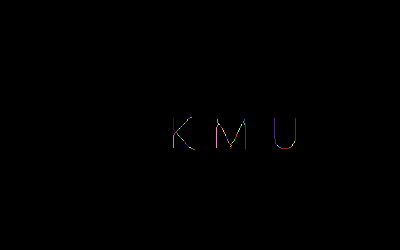

In [7]:
#최상단에 import 를 추가한다.
from google.colab.patches import cv2_imshow


img = cv2.imread('sample.png',0)

labeled_img, label_number = four_connect(img)

# # image 출력
print("label_number : ", label_number)
cv2_imshow(labeled_img)


# 과제2: 8연결성 라벨링
- 위의 8연결성(8-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링하시오.
- cf. 색의 종류에는 제한이 없고, 연결된 픽셀은 같은 숫자 또는 같은 색을 가져야함.-

In [8]:
def bfs_eight(org_img, check, label_number, colors, i, j, row, col):
  q = deque([])
  q.append([i, j])

  dir = ((1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1))
  color = list(np.random.choice(range(256), size = 3))

  cnt = 0

  while q:
    tmp = q.popleft()

    if(check[tmp[0]][tmp[1]] != 1):
       check[tmp[0]][tmp[1]] = 1
       org_img[tmp[0]][tmp[1]] = label_number
       colors[tmp[0]][tmp[1]] = color
       cnt += 1

    for y, x in dir:
      dir_y = tmp[0] + y
      dir_x = tmp[1] + x

      if 0 <= dir_y <= row and 0 <= dir_x <= col:
        if check[dir_y][dir_x] == 0 and org_img[dir_y][dir_x] != 0:
          q.append([dir_y, dir_x])


  return cnt

In [11]:
def eight_connect(img):
  img_sample = np.zeros_like(img)
  img_sample[img > 127] = 1
  row = len(img_sample)
  col = len(img_sample[0])

  org_img = img_sample
  check = np.zeros(org_img.shape)
  label_number = 0
  colors = np.zeros((row, col, 3))

  for i in range(0, row):
    for j in range(0, col):
      if org_img[i][j] == 1 and check[i][j] == 0:
        label_number = label_number + 1
        bfs_eight(org_img, check, label_number, colors, i, j, row, col)



  return colors, label_number

label_number :  3


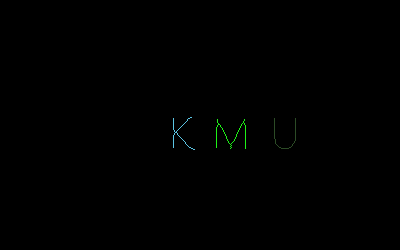

In [12]:
img = cv2.imread('sample.png',0)

labeled_img, label_number = eight_connect(img)

# # image 출력
print("label_number : ", label_number)
cv2_imshow(labeled_img)